<a href="https://colab.research.google.com/github/Ikhwan22/tugasBisnisCerdas2/blob/main/tugasBisnisCerdas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melakukan import data

In [1]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
import io

# Melakukan upload file csv 

In [2]:
uploaded = files.upload()

Saving cell_samples.csv to cell_samples.csv


# Membaca file *csv*

In [3]:
cell_df = pd.read_csv(io.BytesIO(uploaded["cell_samples.csv"]))

# Menampilkan 5 data pertama dalam dataframe

In [4]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Menampilkan Maximum Separability (malignant) 
* Kategori klasifikasi berdasarkan kolom "Class" = 2
* Data plot berasal dari kolom "Clump" dan "UnifSize"
* Nama inisialisasi "**ax**", poin skala = 4

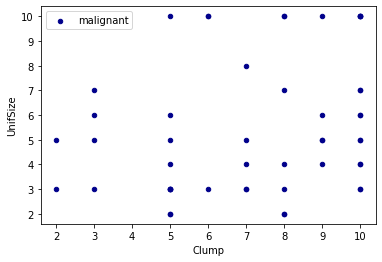

In [5]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

# Menampilkan informasi/status dari 'ax'

In [6]:
ax

# Menampilkan Maximum Separability (benign) 
* Kategori klasifikasi berdasarkan kolom "Class" = 2
* Data plot berasal dari kolom "Clump" dan "UnifSize"
* Nama inisialisasi "**ay**"

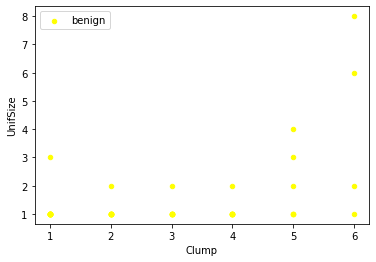

In [7]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign');

# Menampilkan informasi/status dari "ax"

In [8]:
ay

In [27]:
# ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

# Menampilkan tipe data dari data yang ada di file csv, tampilan data berdasarkan kolom

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# Menampilkan tipe data dari data yang ada di file csv
* Data yang digunakan berdasarkan kolom "BareNuc"
* Mengubah tipe data pada kolom "BareNuc" dari object menjadi integer

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Menampilkan data menjadi array
* Data yang dibaca berasal dari kolom
"Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"
* Nama inisialisasi array "X"

In [11]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

# Menampilkan data menjadi array
* Data yang digunakan berasal dari kolom 'Class'
* Tipe data pada kolom "Class" diubah menjadi integer
* Inisialisasi nama array "y"

In [12]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

# Membentuk bagian training dan testing algoritma

In [13]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Menggunakan sklearn untuk SVM
* svm.SVC: C-Support Vector Classification
* Dengan kernel='rbf'
* Nama inisialisasi "**clf**"

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')


# Menampilkan informasi/status dari "clf" berdasarkan "X_train" dan "y-train"

In [15]:
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Menentukan predict dari "clf" dengan "X_test"
* Nama inisialisasi = "**yhat**"

In [16]:
yhat = clf.predict(X_test)

# Menampilkan "yhat" dengan skala 0:5

In [17]:
yhat[0:5]

array([2, 4, 2, 4, 2])

# Import data dari sklearn.metrics

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Membuat confusion matrix
*   Data yang digunakan berasal dari "y_test", "yhat" dengan label [2,4]
*   Nama inisialisasi = "**cnf_matrix**"



In [19]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])

# Mengatur opsi print dari numpy dengan precision=2

In [20]:
np.set_printoptions(precision=2)

# Menampilkan classification report dari "y_test" dan "yhat"

In [21]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Menampilkan informasi ukuran dari matplotlib.pyplot

In [22]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Membuat fungsi plot untuk menampilkan confusion matrix 
*   Nama fungsi "plot_confusion_matrix"
*   Parameter fungsi adalah : 
> cm, classes, normalize, title, cmap

In [23]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Menampilkan plot confusion matrix
* Menggunakan fungsi "plot_confusion_matrix" yang telah dibuat
* Nilai "cm" berasal dari "cnf_matrix"
* Class yang digunakan berdasarkan Maximum Separability "ax" dan "ay" 
* Label dari "ax" dan "ay" bernama "Benign" dan "Malignant"
* Normalize = False





Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


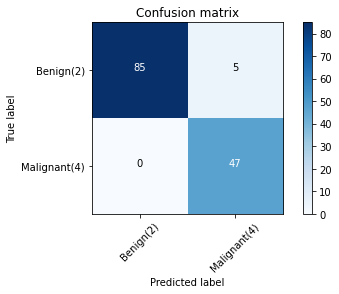

In [24]:
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

# Menampilkan skor f1
* Import f1_score dari sklearn.metrics
* Menampilkan f1_score berdasarkan data "y_test" dan "yhat" dengan rata-rata = "weighted"




In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

# Menampilkan jaccard similarity score berdasarkan data "y_test" dan "yhat"

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365